In [19]:
from numberplate_extractor.number_plate_reader import NumberPlateReader
from PIL import Image
import matplotlib.pyplot as plt
import os

In [23]:
number_plate_reader = NumberPlateReader()

/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


../number_plate_code/model/my_model.h5


## Load example data

In [43]:
directory = 'example_data'
files = os.listdir(directory)
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_files = [os.path.join(directory, file) for file in files if file.lower().endswith(image_extensions)]
number_of_examples = len(image_files)

## Read plate function

This is how you can typically call the functions.

Note that not passing True into `read_number_plate` will just return the plate reading

In [44]:
# Function to read number plate
def read_plate(image_path):
    image = Image.open(image_path)
    number_plate = number_plate_reader.get_number_plate(image)
    plate_reading, seg_number_plate, cntr_plate = number_plate_reader.read_number_plate(number_plate, True)
    return image, number_plate, seg_number_plate, cntr_plate, plate_reading


## Output process and reading from each example

The purpose of this is to objectively see how accurate the recognition program is.

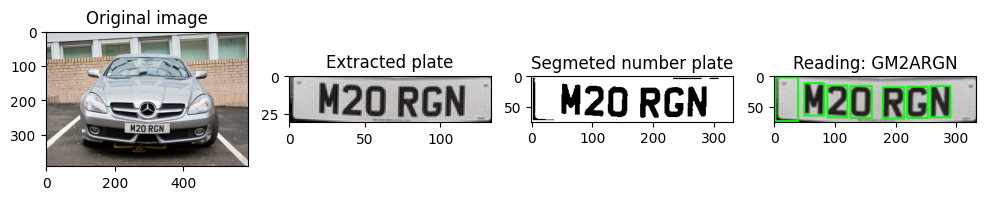

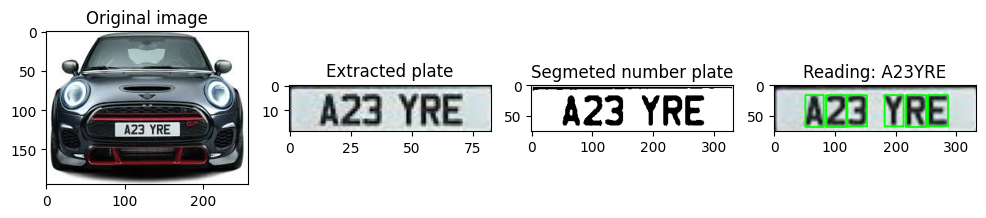

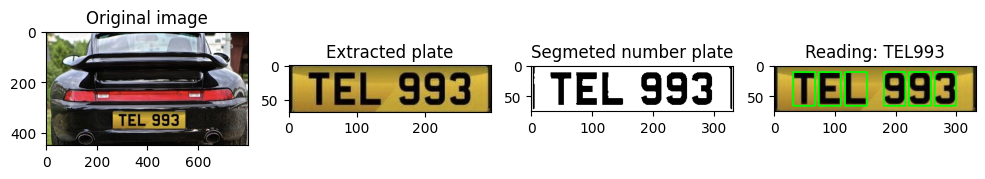

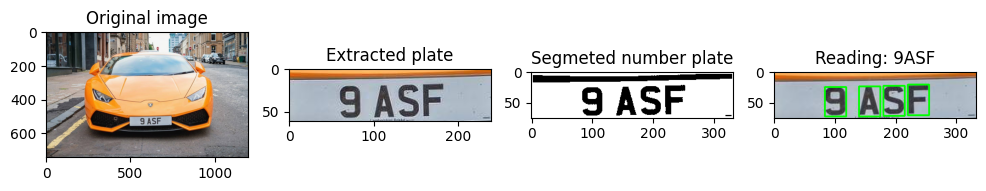

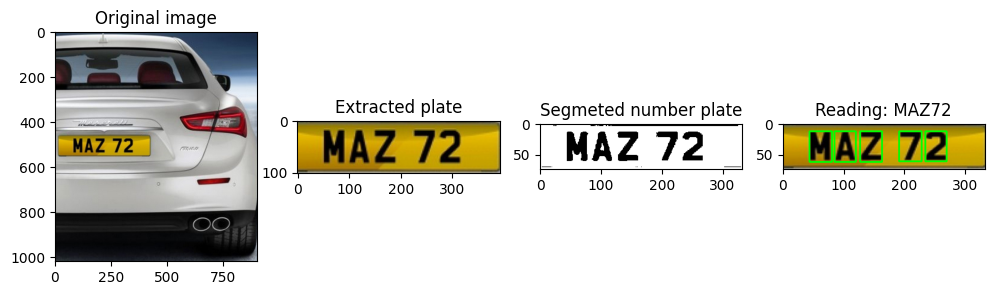

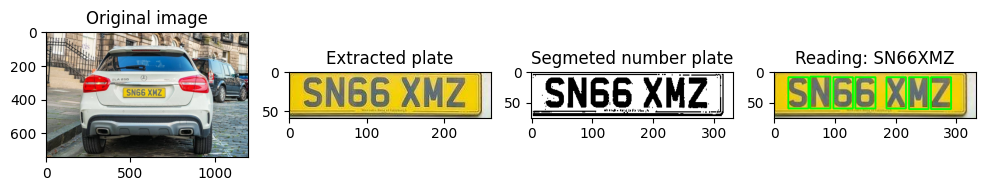

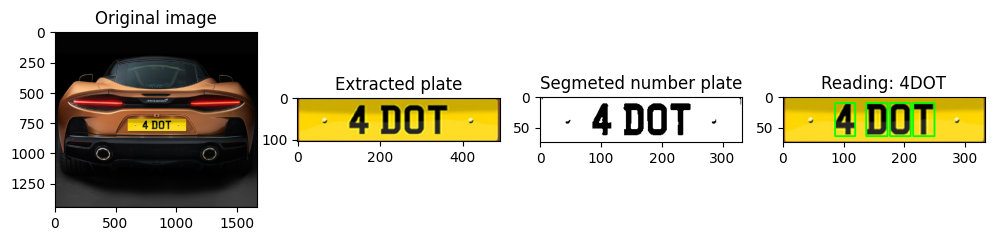

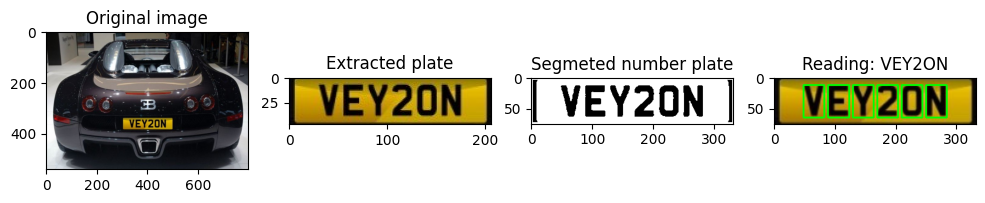

In [50]:
# For each example, display the process
for path in image_files:
    original, number_plate, seg_number_plate, cntr_plate, plate_reading = read_plate(path)
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,8))

    axes[0].imshow(original)
    axes[0].set_title("Original image")

    axes[1].imshow(number_plate)
    axes[1].set_title("Extracted plate")

    axes[2].imshow(seg_number_plate, cmap='gray')
    axes[2].set_title("Segmeted number plate")

    axes[3].imshow(cntr_plate)
    axes[3].set_title(f"Reading: {plate_reading}")